In [1]:
import tensorflow as tf

import pandas as pd
import codecs
import numpy as np
import math
import csv
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score, precision_score # New
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt
import tensorflow.keras.preprocessing
#from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten, Add, Multiply, Subtract
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Activation, BatchNormalization
# regularizers
from tensorflow.keras.layers import Conv1D, Conv2D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dropout, SpatialDropout1D
from scipy import signal
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pylab as plt
import matplotlib.dates as mdates
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from numpy.linalg import svd
import gc
from keijzer import *
from tensorflow import keras
from keras.models import Model
from keras.layers import *
from tensorflow.keras.optimizers import Adam,SGD
from keras.layers import Dense, Input, Flatten, Add, concatenate, Dropout, Activation, Multiply, Embedding, Layer, Reshape
from keras.layers import LSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D  
from keras.layers import Conv1D, AveragePooling1D, MaxPooling1D
#from keras.ops import convert_to_tensor, convert_to_numpy
#from keras.utils import plot_model
from keras import activations
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
import math

class LossHistory(tensorflow.keras.callbacks.Callback):  # history = LossHistory()
    def init(self):  # history.init()
        self.losses = []
        # self.accs = []
        self.val_losses = []
        # self.val_accs = []
        self.rmses = []
        self.mses = []
        self.maes = []
        self.mapes = []
        self.val_rmses = []
        self.val_mses = []
        self.val_maes = []
        self.val_mapes = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        # self.accs.append(logs.get('acc'))
        self.val_losses.append(logs.get('val_loss'))
        # self.val_accs.append(logs.get('val_accuracy
        self.rmses.append(logs.get('root_mean_squared_error'))
        self.mses.append(logs.get('mean_squared_error'))
        self.maes.append(logs.get('mean_absolute_error'))
        self.mapes.append(logs.get('mean_absolute_percentage_error'))
        self.val_rmses.append(logs.get('val_root_mean_squared_error'))
        self.val_mses.append(logs.get('val_mean_squared_error'))
        self.val_maes.append(logs.get('val_mean_absolute_error'))
        self.val_mapes.append(logs.get('val_mean_absolute_percentage_error'))



def root_squared_mean_error(y_true, y_pred):
    return K.mean((K.abs(y_pred - y_true))*K.square(y_true-K.mean(y_true)))*100

def mse_mae(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true))+K.mean(K.abs(y_pred - y_true))

from keras.layers.advanced_activations import PReLU

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [2]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = '0' # 여러개 사용시 '0,1,2' 식으로 하나의 문자열에 입력
gpus = tf.config.experimental.list_physical_devices('GPU') # 호스트 러나임에 표시되는 GPU 장치 목록 반환

if gpus: # 반환된 GPU 장치 목록이 있다면
    try: # 해당 장치에 대한 메모리 증가 활성화 여부 설정
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e: # try문 실패시에 에러문구 출력
        print(e)

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Import Data & Preprocessing

In [3]:
data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2020.csv'
data_source1 = pd.read_csv(data_path)
dat_source1 = pd.DataFrame(data_source1)
#dat_source1 = dat_source1.iloc[:-3,:]

data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2021.csv'
data_source2 = pd.read_csv(data_path)
dat_source2 = pd.DataFrame(data_source2)
dat_source2 = dat_source2.iloc[:8761,:9]

data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2022.csv'
data_source3 = pd.read_csv(data_path)
dat_source3 = pd.DataFrame(data_source3)
dat_source3 = dat_source3.iloc[:8760,:9]

data_path = 'C:/Users/smartgrid_AI/Desktop/windpower_ramprate/ercot_2023.csv'
data_source4 = pd.read_csv(data_path)
dat_source4 = pd.DataFrame(data_source4)
dat_source4 = dat_source4.iloc[:8760,:9]

dat_arr1 = np.array(dat_source1)
dat_arr2 = np.array(dat_source2)
dat_arr3 = np.array(dat_source3)
dat_arr4 = np.array(dat_source4)

dat_arr = np.concatenate([dat_arr1, dat_arr2, dat_arr3, dat_arr4],axis=0)
dat_arr.shape # 8784, 8761, 8760, 8760

dat_source = pd.DataFrame(dat_arr, columns=['Time-Date stamp','Date','ERCOT Load','Total Wind Output','Total Wind Installed','Wind Output, % of Load','Wind Output, % of Installed','1-hr MW change','1-hr % change'])
dat_source

,Time-Date stamp,Date,ERCOT Load,Total Wind Output,Total Wind Installed,"Wind Output, % of Load","Wind Output, % of Installed",1-hr MW change,1-hr % change
0,01-01-2020 00:00:00,Jan-01,36823,12335,27040,33.5,45.617,NaN,NaN
1,01-01-2020 01:00:00,Jan-01,36511,13300,27040,36.4,49.187,965.4,7.826
2,01-01-2020 02:00:00,Jan-01,36022,13586,27040,37.7,50.245,286.2,2.152
3,01-01-2020 03:00:00,Jan-01,35790,14107,27040,39.4,52.171,520.9,3.834
4,01-01-2020 04:00:00,Jan-01,35642,14887,27040,41.8,55.055,779.6,5.527
...,...,...,...,...,...,...,...,...,...
35060,12-31-2023 20:00:00,Dec-31,44887,17161,38631,38.23,44.42,2858,19.99
35061,12-31-2023 21:00:00,Dec-31,44013,18301,38631,41.58,47.37,1139,6.64
35062,12-31-2023 22:00:00,Dec-31,43280,18607,38631,42.99,48.17,307,1.67
35063,12-31-2023 23:00:00,Dec-31,42319,17866,38631,42.22,46.25,-741,-3.98


### Dividing by Installed Capacity & Preprocessing

In [4]:
dat = pd.DataFrame()
dat['MW % change'] = np.array(dat_source.iloc[1:,3], dtype=float)-np.array(dat_source.iloc[0:-1,3], dtype=float)
dat['MW % change'] = np.divide(np.array(dat['MW % change']),np.array(dat_source.iloc[1:,4]))*100
dat['Total Wind Output'] = np.divide(np.array(dat_source.iloc[1:,3]), np.array(dat_source.iloc[1:,4]))

dat

,MW % change,Total Wind Output
0,3.56879,0.491864
1,1.05769,0.502441
2,1.92678,0.521709
3,2.88462,0.550555
4,-0.580621,0.544749
...,...,...
35059,7.3982,0.444229
35060,2.951,0.473739
35061,0.79211,0.48166
35062,-1.91815,0.462478


In [5]:
ramp_ratio = 20
load_ratio = 10
year_arr = np.concatenate([np.ones(8784)*2020, np.ones(8760)*2021, np.ones(8760)*2022, np.ones(8760)*2023])
year_df = pd.DataFrame(year_arr, columns=['Year'], dtype=int)
wind_df = pd.concat([year_df, dat], axis=1)
wind_df

,Year,MW % change,Total Wind Output
0,2020,3.56879,0.491864
1,2020,1.05769,0.502441
2,2020,1.92678,0.521709
3,2020,2.88462,0.550555
4,2020,-0.580621,0.544749
...,...,...,...
35059,2023,7.3982,0.444229
35060,2023,2.951,0.473739
35061,2023,0.79211,0.48166
35062,2023,-1.91815,0.462478


In [6]:
wind_df = wind_df.reset_index(drop=True)
std_scaler = sklearn.preprocessing.MinMaxScaler()
std_scaler_load = sklearn.preprocessing.MinMaxScaler()
std_scaler_ramp = sklearn.preprocessing.MinMaxScaler()

wind_df[['Total Wind Output']] = std_scaler.fit_transform(wind_df[['Total Wind Output']])
wind_df[['MW % change']] = std_scaler_ramp.fit_transform(wind_df[['MW % change']])
#wind_df[['Wind Change, % of Load', 'Wind Change']] = std_scaler_ramp.fit_transform(wind_df[['Wind Change, % of Load', 'Wind Change']])
wind_df = wind_df.iloc[:-1,:]
wind_df

,Year,MW % change,Total Wind Output
0,2020,0.620197,0.644724
1,2020,0.544580,0.658617
2,2020,0.570751,0.683924
3,2020,0.599594,0.721813
4,2020,0.495246,0.714187
...,...,...,...
35058,2023,0.774643,0.484984
35059,2023,0.735512,0.582157
35060,2023,0.601593,0.620917
35061,2023,0.536583,0.631322


In [7]:
ramp_df = pd.DataFrame(wind_df)
ramp_df.columns=['Year', 'Wind Change', 'Wind Output']
ramp_df

,Year,Wind Change,Wind Output
0,2020,0.620197,0.644724
1,2020,0.544580,0.658617
2,2020,0.570751,0.683924
3,2020,0.599594,0.721813
4,2020,0.495246,0.714187
...,...,...,...
35058,2023,0.774643,0.484984
35059,2023,0.735512,0.582157
35060,2023,0.601593,0.620917
35061,2023,0.536583,0.631322


## Wind Ramp Rate Forecasting

### SVD-based Feature Generation

In [8]:
from sklearn.model_selection import train_test_split
from numpy.linalg import svd
import gc

def create_dataset(dataset, timesteps, output_timesteps, leadtime):
    dataX, dataY = [], []
    for i in range(len(dataset) - timesteps -output_timesteps - leadtime - 1):
        a = dataset[i:(i + timesteps), :]
        dataX.append(a)
        dataY.append(dataset[(i + timesteps + leadtime):(i+timesteps+output_timesteps+leadtime), :])
    return np.array(dataX), np.array(dataY)

In [9]:
norm_df = np.array(wind_df['Wind Change']).reshape(-1,1)
timesteps = 24*7
output_timesteps = 24
num_features = 1
leadtime = 6
X, Y = create_dataset(norm_df, timesteps, output_timesteps, leadtime)
b_size = timesteps

In [10]:
dec_num = timesteps
high_ind = 35

addX = np.zeros((X.shape[0], dec_num, high_ind+1))

def svdadd(X, start, end, b_size):
    dec_x = X[start:end, :, :]
    U, S, Vh = svd(dec_x.reshape(b_size, -1))

    high_sig = np.matmul(np.matmul(U[:,:high_ind], np.diag(S[0:high_ind])), Vh[:high_ind,:])
    low_sig = X[:dec_num, :, :].reshape(b_size,-1)-high_sig

    rec_x = np.zeros((b_size, b_size, high_ind))
    #print(sum(S[0:high_ind])/sum(S))
    for i in range(high_ind):
        rec_x[:,:,i] = np.matmul((U[:,i]*S[i]).reshape(-1,1), Vh[i,:].reshape(1,-1))    
    return rec_x, low_sig

for k in range(X.shape[0]//dec_num):
    rec_x, low_sig = svdadd(X, k*dec_num, (k+1)*dec_num, b_size)
    addX[k*dec_num:k*dec_num+dec_num,:, :-1] = rec_x
    addX[k*dec_num:k*dec_num+dec_num,:, -1] = low_sig
    
rec_x, low_sig = svdadd(X, X.shape[0]-dec_num, X.shape[0], b_size)
addX[X.shape[0]-dec_num:X.shape[0], :, :-1] = rec_x
addX[X.shape[0]-dec_num:X.shape[0],:, -1] = low_sig

addX_det = addX[:, :, :-1]
addX_det = np.sum(addX_det, axis=2)
X = np.concatenate([X, addX], axis=2)
num_features = X.shape[2]

### Training/Test Set Division & Shuffled Learning

In [11]:
trvaX, teX, trvaY, teY = train_test_split(X, Y, test_size=0.1, shuffle=False)

idx = np.arange(trvaX.shape[0])
np.random.shuffle(idx)
strvaX = trvaX[idx]
strvaY = trvaY[idx]
strvaY = strvaY.reshape(-1, output_timesteps)

trvaY = trvaY.reshape(-1, output_timesteps)
teY = teY.reshape(-1, output_timesteps)

strX, svaX, strY, svaY = train_test_split(strvaX, strvaY, test_size=0.3, shuffle=False)
trX, vaX, trY, vaY = train_test_split(trvaX, trvaY, test_size=0.3, shuffle=False)

trvaX.shape, trvaY.shape, teX.shape, teY.shape

((31377, 168, 37), (31377, 24), (3487, 168, 37), (3487, 24))

## Wind Ramp Rate Forecasting Basic Model

In [12]:
def MAEMD(y_true, y_pred):
    return K.mean((K.abs(y_pred - y_true))*K.square(y_true-K.mean(y_true)))*100

In [13]:
from keras.layers.advanced_activations import PReLU

In [72]:
from keras import regularizers

num_features = trvaX.shape[2]
output_timesteps = trvaY.shape[1]

with tf.device('/gpu:0'):
    alpha=1.0
    gamma=1
    beta = 1
    hfilters = 168
    hkernel_size1 = 1
    hkernel_size2 = 2
    visible1 = Input(shape=(timesteps, num_features))
   
    ## Attention Block
    pera = Permute((2,1))(visible1)
    den1a = Dense(timesteps, activation='tanh')(pera)
    den1b = Dense(timesteps, activation='sigmoid')(pera)
    den1 = Multiply()([den1a, den1b])
    per2 = Permute((2,1), name='attention_vec')(den1)
    mul1 = Multiply()([visible1, per2])   
    
    ## Permuted Attention Block
    per1 = Permute((2,1))(visible1)
    den2a = Dense(num_features, activation='tanh')(visible1)
    den2b = Dense(num_features, activation='sigmoid')(visible1)
    den2 = Multiply()([den2a, den2b])
    perb2 = Permute((2,1), name='attention_vec2')(den2)
    
    mul2 = Multiply()([per1, perb2])     
    
    ## Parallel DCCNN Blocks 1-1 ~ 3-1
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=1)(mul1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    rres01a = Add()([mul1, d1])   # (100, 25) (100, 25)
    rres01b = Subtract()([mul1, d1])
    
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(rres01a)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    
    d1 = Multiply()([d1a, d1b])
    rres02a = Add()([rres01a, d1])   # (100, 25) (100, 25)
    
    d2 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(rres01b) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    d2 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d2) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    rres02b = Subtract()([rres01b, d2])   # (100, 25) (100, 25) 
    rres02 = Concatenate()([rres02a, rres02b, rres01a, rres01b])
    #rres02 = Dropout(0.2)(rres02)
    
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(rres02)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    rres03a = Add()([rres02a, d1])   # (100, 25) (100, 25)
    
    d2 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(rres02) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    d2 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d2) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    rres03b = Subtract()([rres02b, d2])
    rres03 = Concatenate()([rres03a, rres03b, rres02])
    
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(rres03)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    d1 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    rres04a = Add()([rres03a, d1])   # (100, 25) (100, 25)
    
    d2 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(rres03) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    d2 = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d2) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    rres04b = Subtract()([rres03b, d2])
    rres10 = Concatenate()([rres04a, rres04b, rres03])

    ## Right-half DCCNN Blocks 1-2 ~ 3-2
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=1)(mul2)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    d1 = Conv1D(filters=timesteps, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    res01a = Add()([mul2, d1])   # (100, 25) (100, 25)
    res01b = Subtract()([mul2, d1])
    
    
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res01a)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    d1 = Conv1D(filters=timesteps, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    
    d1 = Multiply()([d1a, d1b])
    res02a = Add()([res01a, d1])   # (100, 25) (100, 25)
    
    d2 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res01b) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    d2 = Conv1D(filters=timesteps, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d2) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    res02b = Subtract()([res01b, d2])   # (100, 25) (100, 25) 
    res02 = Concatenate()([res02a, res02b, res01a, res01b])
    #res02 = Dropout(0.2)(res02)
    
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res02)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    d1 = Conv1D(filters=timesteps, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    res03a = Add()([res02a, d1])   # (100, 25) (100, 25)
    
    d2 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res02) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    d2 = Conv1D(filters=timesteps, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d2) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    res03b = Subtract()([res02b, d2])
    res03 = Concatenate()([res03a, res03b, res02])
    
    d1 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res03)
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    d1 = Conv1D(filters=timesteps, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1)    
    d1a = Activation(activations.tanh)(d1)
    d1b = Activation(activations.sigmoid)(d1)
    d1 = Multiply()([d1a, d1b])
    
    res04a = Add()([res03a, d1])   # (100, 25) (100, 25)
    
    d2 = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res03) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    d2 = Conv1D(filters=timesteps, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d2) 
    d2a = Activation(activations.tanh)(d2)
    d2b = Activation(activations.sigmoid)(d2)
    d2 = Multiply()([d2a, d2b])
    
    res04b = Subtract()([res03b, d2])
    res10 = Concatenate()([res04a, res04b, res03])
    print(rres10.shape)
    
    ## Output Blocks
    out1 = Conv1D(24*7, 1, padding='same', activation=PReLU())(res10)   # 256, 11X10=110
    out1 = Dropout(0.2)(out1)  
    
    out2 = Conv1D(24*7, 1, padding='same', activation=PReLU())(rres10)   # 256, 11X10=110
    out2 = Dropout(0.2)(out2)
    
    out = Concatenate(axis=1)([out1, out2])
    
    ## Output Block
    out = Conv1D(24*7, 1, padding='same', activation=PReLU())(out) # 512,  110X5=550
    out = Dropout(0.2)(out)

    #, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)
    out = GlobalAveragePooling1D()(out) 

    out = Dense(output_timesteps)(out) 
    model = Model(inputs=[visible1], outputs=[out])
    
    print(model.summary())

(None, 168, 296)
Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 168, 37)]    0                                            
__________________________________________________________________________________________________
permute_16 (Permute)            (None, 37, 168)      0           input_9[0][0]                    
__________________________________________________________________________________________________
dense_41 (Dense)                (None, 168, 37)      1406        input_9[0][0]                    
__________________________________________________________________________________________________
dense_42 (Dense)                (None, 168, 37)      1406        input_9[0][0]                    
___________________________________________________________________________

In [73]:
gc.collect()

269558

In [74]:
    model.compile(loss=MAEMD, optimizer='adam', metrics=['mse','mae', MAEMD])
    early_stopping =EarlyStopping(monitor='val_loss', patience=10)
    batch_size = 168
    epochs = 1000
    #root_squared_mean_error
    history = LossHistory()
    history.init()
    
    #hist = model.fit(trX, trY, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaX, vaY), callbacks=[history, early_stopping])  # , checkpoint

In [75]:
    %%time
    b_size = 168
    #hist = model.fit(strvaX, strvaY, epochs=epochs, batch_size=b_size, shuffle=False, validation_data=(teX, teY), callbacks=[history, early_stopping])  # , checkpoint
    hist = model.fit(strX, strY, epochs=epochs, batch_size=b_size, shuffle=False, validation_data=(svaX, svaY), callbacks=[history, early_stopping])  # , checkpoint

Epoch 1/1000
131/131 [==============================] - 52s 338ms/step - loss: 0.2134 - mse: 0.0277 - mae: 0.1178 - MAEMD: 0.2134 - val_loss: 0.1963 - val_mse: 0.0119 - val_mae: 0.0832 - val_MAEMD: 0.1944
Epoch 2/1000
131/131 [==============================] - 37s 287ms/step - loss: 0.1772 - mse: 0.0149 - mae: 0.0954 - MAEMD: 0.1772 - val_loss: 0.1454 - val_mse: 0.0164 - val_mae: 0.1021 - val_MAEMD: 0.1442
Epoch 3/1000
131/131 [==============================] - 37s 285ms/step - loss: 0.1376 - mse: 0.0182 - mae: 0.1085 - MAEMD: 0.1376 - val_loss: 0.1355 - val_mse: 0.0170 - val_mae: 0.1052 - val_MAEMD: 0.1344
Epoch 4/1000
131/131 [==============================] - 36s 276ms/step - loss: 0.1331 - mse: 0.0183 - mae: 0.1089 - MAEMD: 0.1331 - val_loss: 0.1341 - val_mse: 0.0178 - val_mae: 0.1082 - val_MAEMD: 0.1330
Epoch 5/1000
131/131 [==============================] - 38s 287ms/step - loss: 0.1307 - mse: 0.0182 - mae: 0.1087 - MAEMD: 0.1307 - val_loss: 0.1316 - val_mse: 0.0177 - val_mae: 0.

KeyboardInterrupt: 

### Saving Basic Model Training Results

In [46]:
model.save('Basic Ramp Model Final_lead.h5')

In [47]:
gc.collect()

234423

In [48]:
loss_history = hist.history['loss']
valloss_history = hist.history['val_loss']

In [14]:
with tf.device('/gpu:0'):
    model = keras.models.load_model('Basic Ramp Model Final_lead.h5', custom_objects={'MAEMD': MAEMD})
    gc.collect()

In [32]:
layer_name = 'attention_vec'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(strvaX)

In [33]:
avg_int_output = np.mean(intermediate_output, axis=0)
avg_int_output.shape

(168, 37)

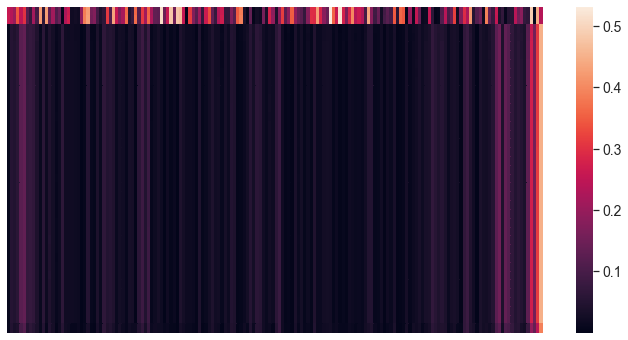

In [34]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(12, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(np.transpose(abs(avg_int_output)), cmap="rocket")
lx = ax.set_xticklabels([])
ly = ax.set_yticklabels([])
cax = ax.figure.axes[-1]
cax.tick_params(labelsize=14)

f.savefig('ramp_attention_output.png', dpi=1000, bbox_inches="tight")
#f.savefig('ramp_attention_output.eps', dpi=1000, bbox_inches="tight")

In [35]:
plt.cla()   # clear the current axes
plt.clf()   # clear the current figure
plt.close() #

In [36]:
layer_name = 'attention_vec2'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(strvaX)
avg_int_output = np.mean(intermediate_output, axis=0)
avg_int_output.shape

(37, 168)

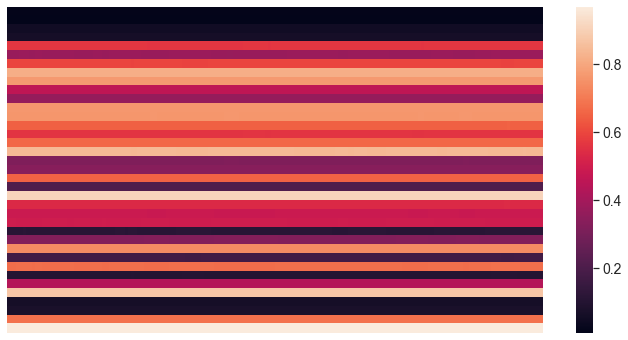

In [37]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(12, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(np.transpose(abs(avg_int_output)), cmap="rocket")
sns.heatmap((abs(avg_int_output)), cmap="rocket")
lx = ax.set_xticklabels([])
ly = ax.set_yticklabels([])
cax = ax.figure.axes[-1]
cax.tick_params(labelsize=14)

f.savefig('ramp_attention_output2.png', dpi=1000, bbox_inches="tight")
#f.savefig('ramp_attention_output.eps', dpi=1000, bbox_inches="tight")

In [38]:
plt.cla()   # clear the current axes
plt.clf()   # clear the current figure
plt.close() #

## Basic Model Test Results

In [15]:
batch_size = 168

testPredict = model.predict(teX, batch_size=batch_size)

In [16]:
def npMAEMS(y_true, y_pred):
    return np.mean((abs(y_pred - y_true))*np.square(y_true))*100
def npMAEMD(y_true, y_pred):
    return np.mean((abs(y_pred - y_true))*np.square(y_true-np.mean(y_true)))*100
def npMSE(y_true, y_pred):
    return np.mean(np.square(-y_true+y_pred))
def npMAE(y_true, y_pred):
    return np.mean(abs(-y_true+y_pred))

In [17]:
tePredict = testPredict.reshape(-1)
testY = teY.reshape(-1)
print('Error Test Score > MSE == ', npMSE(testY, tePredict), ' MAE == ', npMAE(testY, tePredict), ' MAEMD == ', npMAEMD(testY, tePredict))

Error Test Score > MSE ==  0.013735277815234795  MAE ==  0.09257788197673515  MAEMD ==  0.10327403141510459


## Wind Ramp Rate FFEL Model

In [18]:
trX, vaX, trY, vaY = train_test_split(trvaX, trvaY, test_size=1/6, shuffle=False)
trY = trY.reshape(-1,output_timesteps)
vaY = vaY.reshape(-1,output_timesteps)

In [19]:
trainPredict = model.predict(trX, batch_size=batch_size)
validPredict = model.predict(vaX, batch_size=batch_size)

In [20]:
e_tr = trainPredict - trY
e_va = validPredict - vaY
errors = np.vstack([e_tr, e_va])
prediction = np.vstack([trainPredict, validPredict])
print(errors.shape)
print(prediction.shape)

(31377, 24)
(31377, 24)


In [21]:
norm_df2 = pd.DataFrame(norm_df).iloc[:prediction.shape[0], :]
norm_df2.columns = ['Normalized Ramp']
norm_df2.head()

,Normalized Ramp
0,0.620197
1,0.544580
2,0.570751
3,0.599594
4,0.495246


In [22]:
Prindex = ['Prediction1', 'Prediction2','Prediction3','Prediction4','Prediction5','Prediction6','Prediction7','Prediction8','Prediction9','Prediction10','Prediction11','Prediction12','Prediction13', 'Prediction14','Prediction15','Prediction16','Prediction17','Prediction18','Prediction19','Prediction20','Prediction21','Prediction22','Prediction23','Prediction24']
Erindex = ['Error1', 'Error2','Error3','Error4','Error5','Error6','Error7','Error8','Error9','Error10','Error11','Error12','Error13', 'Error14','Error15','Error16','Error17','Error18','Error19','Error20','Error21','Error22','Error23','Error24']

pr_df = pd.DataFrame(prediction, columns=Prindex)
pr_df

,Prediction1,Prediction2,Prediction3,Prediction4,Prediction5,Prediction6,Prediction7,Prediction8,Prediction9,Prediction10,...,Prediction15,Prediction16,Prediction17,Prediction18,Prediction19,Prediction20,Prediction21,Prediction22,Prediction23,Prediction24
0,0.444676,0.436860,0.302638,0.297785,0.421782,0.451090,0.508404,0.556098,0.610513,0.662830,...,0.684189,0.526042,0.527760,0.481013,0.430079,0.408124,0.432230,0.469366,0.433775,0.384112
1,0.393561,0.369372,0.341190,0.454414,0.465517,0.417204,0.480796,0.600435,0.554215,0.490364,...,0.581016,0.507182,0.464872,0.451960,0.443003,0.481689,0.423889,0.405364,0.397222,0.416176
2,0.281735,0.346389,0.429335,0.435216,0.366630,0.436345,0.543661,0.533085,0.459744,0.470875,...,0.567222,0.423415,0.388701,0.456166,0.445300,0.433350,0.371297,0.371676,0.375083,0.343617
3,0.273427,0.444346,0.433546,0.422055,0.460161,0.555514,0.524731,0.452719,0.558419,0.729217,...,0.508064,0.361275,0.333902,0.435677,0.491621,0.446159,0.403773,0.422831,0.386955,0.269077
4,0.319735,0.396001,0.406660,0.442480,0.450827,0.488388,0.501562,0.536546,0.686988,0.684791,...,0.371363,0.347615,0.369525,0.380759,0.330504,0.357211,0.368331,0.359699,0.245907,0.257066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31372,0.179432,0.186400,0.283756,0.466718,0.550215,0.626457,0.742539,0.753185,0.771121,0.811836,...,0.426471,0.393733,0.363955,0.341164,0.313086,0.315988,0.188803,0.198456,0.349545,0.403387
31373,0.248527,0.388267,0.484408,0.582086,0.607232,0.743621,0.720474,0.596254,0.684116,0.819395,...,0.399665,0.336597,0.368596,0.407575,0.346324,0.270225,0.236950,0.354727,0.326925,0.250012
31374,0.382436,0.548531,0.568935,0.627955,0.673686,0.744356,0.625724,0.633339,0.764129,0.785478,...,0.474984,0.375184,0.370839,0.316162,0.293981,0.240323,0.357223,0.376408,0.325814,0.253837
31375,0.479252,0.603519,0.582363,0.605877,0.628811,0.653491,0.664704,0.711577,0.780092,0.687738,...,0.380617,0.402319,0.347452,0.265388,0.290139,0.437950,0.357874,0.310164,0.267198,0.362260


In [23]:
er_df = pd.DataFrame(errors, columns=Erindex)
er_df

,Error1,Error2,Error3,Error4,Error5,Error6,Error7,Error8,Error9,Error10,...,Error15,Error16,Error17,Error18,Error19,Error20,Error21,Error22,Error23,Error24
0,-0.204030,-0.126875,-0.087480,-0.235325,-0.280824,-0.044936,-0.002878,0.027443,0.082637,0.115800,...,0.131257,-0.015420,0.080290,0.090539,-0.044515,-0.054864,-0.051649,-0.003791,-0.024128,-0.300063
1,-0.170174,-0.020746,-0.191920,-0.248192,-0.030508,-0.094078,-0.047859,0.072560,0.007185,-0.031052,...,0.039554,0.059712,0.074398,-0.022634,-0.019984,-0.002190,-0.049268,-0.052539,-0.286953,0.001715
2,-0.108383,-0.186720,-0.273272,-0.060809,-0.144652,-0.092310,0.015785,-0.013946,-0.061673,-0.070142,...,0.119752,0.032941,-0.085894,-0.006822,-0.038579,-0.039807,-0.086606,-0.312500,-0.039378,-0.060564
3,-0.259683,-0.258260,-0.062479,-0.089227,-0.068494,0.027638,-0.022300,-0.068697,0.017402,0.151561,...,0.117590,-0.113319,-0.129085,-0.048202,0.018464,-0.011743,-0.280403,0.008370,-0.017226,-0.042915
4,-0.382871,-0.100024,-0.104622,-0.086175,-0.077048,-0.058643,-0.019854,-0.004471,0.109333,0.162929,...,-0.103231,-0.115373,-0.114354,-0.092398,-0.127399,-0.326964,-0.046130,-0.044482,-0.066084,-0.059237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31372,-0.127168,-0.198049,-0.109804,-0.008127,0.022299,0.069368,0.114236,0.104901,0.112446,0.141812,...,0.133218,-0.041549,-0.343795,-0.245338,-0.131787,-0.185393,-0.361092,-0.238903,-0.137608,0.050349
31373,-0.135921,-0.005294,0.009563,0.054170,0.050143,0.115318,0.072189,-0.062421,0.014091,0.136823,...,-0.035617,-0.371152,-0.217905,-0.037298,-0.155057,-0.279670,-0.200410,-0.132426,-0.026113,-0.080007
31374,-0.011124,0.073686,0.041019,0.070866,0.045382,0.096072,-0.032951,-0.036685,0.081556,0.181232,...,-0.232766,-0.211318,-0.074034,-0.185219,-0.255915,-0.197037,-0.129930,0.023370,-0.004205,-0.127974
31375,0.004407,0.075603,0.025274,-0.022426,-0.019474,-0.005184,-0.005320,0.029005,0.175846,0.207538,...,-0.205885,-0.042554,-0.153929,-0.284508,-0.147221,-0.049204,0.004837,-0.019855,-0.114613,-0.076378


In [24]:
norm_df2 = pd.concat([norm_df2, pr_df, er_df],axis=1)
norm_df2.head()

,Normalized Ramp,Prediction1,Prediction2,Prediction3,Prediction4,Prediction5,Prediction6,Prediction7,Prediction8,Prediction9,...,Error15,Error16,Error17,Error18,Error19,Error20,Error21,Error22,Error23,Error24
0,0.620197,0.444676,0.436860,0.302638,0.297785,0.421782,0.451090,0.508404,0.556098,0.610513,...,0.131257,-0.015420,0.080290,0.090539,-0.044515,-0.054864,-0.051649,-0.003791,-0.024128,-0.300063
1,0.544580,0.393561,0.369372,0.341190,0.454414,0.465517,0.417204,0.480796,0.600435,0.554215,...,0.039554,0.059712,0.074398,-0.022634,-0.019984,-0.002190,-0.049268,-0.052539,-0.286953,0.001715
2,0.570751,0.281735,0.346389,0.429335,0.435216,0.366630,0.436345,0.543661,0.533085,0.459744,...,0.119752,0.032941,-0.085894,-0.006822,-0.038579,-0.039807,-0.086606,-0.312500,-0.039378,-0.060564
3,0.599594,0.273427,0.444346,0.433546,0.422055,0.460161,0.555514,0.524731,0.452719,0.558419,...,0.117590,-0.113319,-0.129085,-0.048202,0.018464,-0.011743,-0.280403,0.008370,-0.017226,-0.042915
4,0.495246,0.319735,0.396001,0.406660,0.442480,0.450827,0.488388,0.501562,0.536546,0.686988,...,-0.103231,-0.115373,-0.114354,-0.092398,-0.127399,-0.326964,-0.046130,-0.044482,-0.066084,-0.059237


In [25]:
norm_df22 = pd.DataFrame(norm_df).iloc[prediction.shape[0]+timesteps:, :]
norm_df22.columns = ['Normalized Wind']
npnorm22 = np.array(norm_df22)

In [26]:
pr_df = pd.DataFrame(tePredict.reshape(-1,24))
pr_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.543832,0.654460,0.661829,0.563464,0.599267,0.699634,0.721294,0.555084,0.459930,0.413151,...,0.383349,0.378832,0.416335,0.502154,0.421978,0.295683,0.288353,0.526186,0.635084,0.611497
1,0.630573,0.672083,0.612464,0.601688,0.777240,0.809328,0.738840,0.605367,0.463053,0.389225,...,0.356993,0.294499,0.445579,0.447441,0.337021,0.303622,0.396032,0.643599,0.670800,0.686093
2,0.640508,0.585354,0.583009,0.666596,0.664024,0.573583,0.461036,0.441605,0.395695,0.328200,...,0.375800,0.405021,0.418488,0.361929,0.330251,0.482720,0.586071,0.635742,0.625080,0.678007
3,0.591370,0.674265,0.745430,0.724724,0.604814,0.500152,0.434369,0.341298,0.316183,0.293644,...,0.404902,0.393448,0.282479,0.282697,0.390511,0.558223,0.624812,0.681554,0.686911,0.628185
4,0.595108,0.688872,0.715966,0.548925,0.410343,0.399815,0.391418,0.331532,0.318394,0.353330,...,0.529118,0.322337,0.281502,0.436176,0.605363,0.580775,0.560694,0.602099,0.660337,0.573784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,0.414186,0.476000,0.489328,0.438869,0.397788,0.387884,0.359688,0.301307,0.313337,0.343947,...,0.510686,0.476882,0.599392,0.656811,0.658377,0.661628,0.581761,0.552943,0.446615,0.388538
3483,0.508140,0.565769,0.503267,0.429874,0.419059,0.406631,0.322405,0.224723,0.307368,0.408572,...,0.608613,0.580088,0.729738,0.743280,0.734202,0.688269,0.650296,0.610259,0.502680,0.398985
3484,0.571365,0.594385,0.533655,0.447615,0.336455,0.310910,0.312988,0.408423,0.480554,0.471709,...,0.503992,0.626963,0.766269,0.680384,0.610868,0.560537,0.500876,0.383980,0.336071,0.385004
3485,0.503822,0.450070,0.395983,0.336282,0.289279,0.318499,0.399246,0.489296,0.530354,0.551319,...,0.573304,0.705280,0.809377,0.687193,0.548680,0.429719,0.332872,0.316301,0.372328,0.450443


In [27]:
teY = testY.reshape(-1,24)
e_te = testPredict-teY
er_df = pd.DataFrame(e_te, columns=Erindex)
er_df

,Error1,Error2,Error3,Error4,Error5,Error6,Error7,Error8,Error9,Error10,...,Error15,Error16,Error17,Error18,Error19,Error20,Error21,Error22,Error23,Error24
0,-0.013257,0.026157,0.013545,-0.095211,-0.070758,0.017061,0.117048,0.074884,0.119121,0.119898,...,-0.118032,-0.171063,-0.021024,0.015000,0.068940,-0.034336,-0.093458,0.087547,0.091583,0.068395
1,0.002270,0.023798,-0.046211,-0.068336,0.094668,0.205083,0.258640,0.264558,0.169800,-0.046056,...,-0.192903,-0.142861,-0.041575,0.094404,0.007002,-0.078189,-0.042606,0.100098,0.127698,0.118134
2,-0.007777,-0.073321,-0.087016,-0.015977,0.059778,0.093383,0.120227,0.148352,-0.039587,-0.379550,...,-0.061560,-0.082133,0.065451,0.031910,-0.051560,0.044082,0.042570,0.092640,0.057122,0.026365
3,-0.067305,0.004240,0.062857,0.120478,0.124614,0.159342,0.141116,-0.093983,-0.391566,-0.292858,...,-0.082252,0.040411,-0.047540,-0.099114,-0.048127,0.014721,0.081710,0.113595,0.035269,0.008115
4,-0.074916,0.006299,0.111720,0.068725,0.069534,0.106562,-0.043863,-0.376217,-0.268107,-0.091543,...,0.176080,-0.007682,-0.100309,-0.002462,0.061861,0.037673,-0.007265,-0.049542,0.040266,-0.009441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,-0.196138,-0.370279,-0.373165,-0.357444,-0.342400,-0.236783,-0.203865,-0.171746,-0.122145,-0.077425,...,0.155104,0.052703,0.384354,0.199425,0.063254,0.187951,0.106291,0.012931,-0.106415,-0.192633
3483,-0.338139,-0.296724,-0.293046,-0.310314,-0.205607,-0.156922,-0.150648,-0.210758,-0.114004,-0.030027,...,0.184434,0.365050,0.272352,0.148157,0.260525,0.212799,0.110283,0.057229,-0.078491,-0.181873
3484,-0.291127,-0.201928,-0.206534,-0.177051,-0.227098,-0.162144,-0.122494,-0.012949,0.041954,0.067096,...,0.288954,0.169578,0.171145,0.206707,0.135398,0.020525,-0.052154,-0.197190,-0.244787,-0.389639
3485,-0.292490,-0.290119,-0.228683,-0.227271,-0.183775,-0.116983,-0.022126,0.050696,0.125740,0.143822,...,0.115919,0.110157,0.335700,0.211723,0.008668,-0.123311,-0.248298,-0.264558,-0.402315,-0.285069


In [28]:
prnorm = np.array(pr_df)
ernorm =np.array(er_df)
print(ernorm.shape)

(3487, 24)


In [29]:
etedat = np.concatenate((npnorm22[:prnorm.shape[0],:], prnorm, ernorm), axis=1)
etedat[169:171,:]

array([[ 0.37973304,  0.58168519,  0.60544753,  0.54663783,  0.53608632,
         0.62316757,  0.60378921,  0.52027524,  0.38854301,  0.34092382,
         0.45156395,  0.51253438,  0.56806505,  0.50199193,  0.43575025,
         0.37629715,  0.34810576,  0.51436853,  0.53225011,  0.47493756,
         0.39577472,  0.4452551 ,  0.50394899,  0.49134061,  0.51242119,
        -0.03702677, -0.02701171, -0.05057401,  0.1140724 ,  0.22177458,
         0.17082542,  0.09338582, -0.04098396, -0.07509565,  0.03002959,
         0.08436615,  0.15963856,  0.06679021, -0.0090426 , -0.08408128,
        -0.06991186, -0.05726697,  0.03998118,  0.05644038, -0.06140667,
        -0.04237812, -0.0191714 , -0.05288026, -0.07655827],
       [ 0.43384298,  0.54045868,  0.54403424,  0.58192766,  0.59073418,
         0.53344572,  0.47046873,  0.37595931,  0.33545759,  0.39590016,
         0.42598021,  0.43417209,  0.46262547,  0.43737057,  0.36278373,
         0.36330411,  0.35731068,  0.39242804,  0.40086144,  0.

In [30]:
output_timesteps = 1
eteX, eteY = create_dataset(etedat, timesteps, output_timesteps, 0)
eteY.shape

(3317, 1, 49)

In [31]:
eteY = eteY[:,:,-24:].reshape(-1,24)

In [32]:
norm_df2 = np.array(norm_df2)
output_timesteps = 1
Xe, Ye = create_dataset(norm_df2, timesteps, output_timesteps, 0)
Ye.shape

(31207, 1, 49)

In [33]:
Ye = Ye[:,:,-24:].reshape(-1,24)
print(Xe.shape)
print(Ye.shape)

(31207, 168, 49)
(31207, 24)


In [34]:
trXe, vaXe, trYe, vaYe = train_test_split(Xe, Ye, test_size=0.3, shuffle=False)

In [35]:
gc.collect()

6271

In [36]:
eteX.shape, eteY.shape, Xe.shape, Ye.shape

((3317, 168, 49), (3317, 24), (31207, 168, 49), (31207, 24))

In [37]:
def mse_mae(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true))*10+K.mean(K.abs(y_pred - y_true))

In [38]:
num_features = Xe.shape[2]

with tf.device('/gpu:0'):
    alpha=1.0
    gamma=1.2
    beta = 1
    hfilters = 256
    hkernel_size1 = 1
    hkernel_size2 = 2
    visible1e = Input(shape=(timesteps, num_features))
   
    per1e = Permute((2,1))(visible1e)
    den1ae = Dense(timesteps, activation='tanh')(per1e)
    den1be = Dense(timesteps, activation='sigmoid')(per1e)
    den1e = Multiply()([den1ae, den1be])
    per2e = Permute((2,1), name='attention_vec')(den1e)
    mul1e = Multiply()([visible1e, per2e])
    
    d1e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=1)(mul1e)
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    d1e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1e)
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    res01ae = Add()([visible1e, d1e])   # (100, 25) (100, 25)
    res01be = Subtract()([visible1e, d1e])

    d1e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res01ae)
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    d1e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1e)    
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    
    d1e = Multiply()([d1ae, d1be])
    res02ae = Add()([res01ae, d1e])   # (100, 25) (100, 25)
    
    d2e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res01be) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    d2e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d2e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    res02be = Subtract()([res01be, d2e])   # (100, 25) (100, 25) 
    res02e = Concatenate()([res02ae, res02be, res01ae, res01be])
    
    d1e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res02e)
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    d1e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d1e)    
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    res03ae = Add()([res02ae, d1e])   # (100, 25) (100, 25)
    
    d2e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res02e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    d2e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=8)(d2e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    res03be = Subtract()([res02be, d2e])   # (100, 25) (100, 25)
    res03e = Concatenate()([res03ae, res03be, res02e])
    
    d1e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res03e)
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    d1e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d1e)    
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    res04ae = Add()([res03ae, d1e])   # (100, 25) (100, 25)
    
    d2e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=8)(res03e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    d2e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=4)(d2e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    res04be = Subtract()([res02be, d2e])   # (100, 25) (100, 25)
    res04e = Concatenate()([res04ae, res04be, res03e])
    
    d1e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res04e)
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    d1e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d1e)    
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    res05ae = Add()([res04ae, d1e])   # (100, 25) (100, 25)
    
    d2e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=4)(res04e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    d2e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=2)(d2e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    
    res05be = Subtract()([res04be, d2e])   # (100, 25) (100, 25)
    res05e = Concatenate()([res05ae, res05be, res04e])
    
    d1e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res05e)
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])
    
    d1e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=1)(d1e)    
    d1ae = Activation(activations.tanh)(d1e)
    d1be = Activation(activations.sigmoid)(d1e)
    d1e = Multiply()([d1ae, d1be])

    res06ae = Add()([res05ae, d1e])   # (100, 25) (100, 25)
    
    d2e = Conv1D(filters=round(hfilters*alpha), kernel_size=round(hkernel_size1*beta), padding='causal', dilation_rate=2)(res05e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])
    d2e = Conv1D(filters=num_features, kernel_size=round(hkernel_size2*beta), padding='causal', dilation_rate=1)(d2e) 
    d2ae = Activation(activations.tanh)(d2e)
    d2be = Activation(activations.sigmoid)(d2e)
    d2e = Multiply()([d2ae, d2be])

    res06be = Subtract()([res05be, d2e])   # (100, 25) (100, 25)
    res06e = Concatenate()([res05ae, res05be])
    
    res10e = Concatenate()([res02e, res03e, res04e, res05e, res06e])   # 
    
    #print('res10 :', res10.shape)  # (None, 24, 11) 
    
    oute = Conv1D(720, 1, padding='same', activation=PReLU())(res10e)   # 256, 11X10=110
    oute = Dropout(0.2)(oute)   #SpatialDropout1D
    
    oute = Conv1D(360, 1, padding='same', activation=PReLU())(oute) # 512,  110X5=550
    oute = Dropout(0.2)(oute)
    
    oute = GlobalAveragePooling1D()(oute) # pool_size=2, strides=1
    
    oute = Dense(24)(oute) 
    modele = Model(inputs=[visible1e], outputs=[oute])
    
    print(modele.summary())
    
    modele.compile(loss=mse_mae, optimizer='adam', metrics=['mse','mae','mape'])
    early_stopping =EarlyStopping(monitor='val_loss', patience=10)
    batch_size = 168
    epochs = 1000

    history_e = LossHistory()
    history_e.init()
    
    #hist = model.fit(trX, trY, epochs=epochs, batch_size=batch_size, shuffle=False, validation_data=(vaX, vaY), callbacks=[history, early_stopping])  # , checkpoint

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 168, 49)]    0                                            
__________________________________________________________________________________________________
permute (Permute)               (None, 49, 168)      0           input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 49, 168)      28392       permute[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 49, 168)      28392       permute[0][0]                    
______________________________________________________________________________________________

In [39]:
gc.collect()

2538

In [40]:
# %%time
    histe = modele.fit(trXe, trYe, epochs=epochs, batch_size=b_size, shuffle=False, validation_data=(vaXe, vaYe), callbacks=[history_e, early_stopping])  # , checkpoint

Epoch 1/1000
131/131 [==============================] - 27s 176ms/step - loss: 0.2851 - mse: 0.0191 - mae: 0.0938 - mape: 484.2299 - val_loss: 0.1640 - val_mse: 0.0090 - val_mae: 0.0744 - val_mape: 426.6877
Epoch 2/1000
131/131 [==============================] - 21s 159ms/step - loss: 0.1772 - mse: 0.0099 - mae: 0.0781 - mape: 442.5740 - val_loss: 0.1392 - val_mse: 0.0073 - val_mae: 0.0667 - val_mape: 373.2038
Epoch 3/1000
131/131 [==============================] - 21s 161ms/step - loss: 0.1475 - mse: 0.0078 - mae: 0.0690 - mape: 415.0349 - val_loss: 0.1158 - val_mse: 0.0057 - val_mae: 0.0591 - val_mape: 427.9271
Epoch 4/1000
131/131 [==============================] - 21s 158ms/step - loss: 0.1279 - mse: 0.0065 - mae: 0.0629 - mape: 401.6848 - val_loss: 0.1039 - val_mse: 0.0049 - val_mae: 0.0549 - val_mape: 412.4030
Epoch 5/1000
131/131 [==============================] - 20s 151ms/step - loss: 0.1194 - mse: 0.0059 - mae: 0.0601 - mape: 411.6657 - val_loss: 0.0965 - val_mse: 0.0044 - va

### Saving FFEL Model Training Results

In [41]:
eloss_history = histe.history['loss']
valeloss_history = histe.history['val_loss']

In [42]:
#np.savetxt('ramp_elosshistory.txt',(eloss_history, valeloss_history))

In [43]:
modele.save('Error Learning Ramp Model_lead.h5')

In [44]:
gc.collect()

4574

## FFEL Model Test Results

In [45]:
batch_size = 168
trainePredict = modele.predict(Xe, batch_size=batch_size)
etePredict = modele.predict(eteX, batch_size=batch_size)

In [46]:
trePredict = trainePredict.reshape([-1])
trainYe = Ye.reshape([-1])

print('Error Training Score > MSE == ', (np.mean(np.square(trainYe-trePredict))), ' MAE == ', mean_absolute_error(trainYe,trePredict), ' RMSE == ', np.sqrt(np.mean(np.square(trainYe-trePredict))))

Error Training Score > MSE ==  0.0028353837893406726  MAE ==  0.04166487740595779  RMSE ==  0.05324832193919986


In [47]:
etestPredict = etePredict.reshape([-1])
testYe = eteY.reshape([-1])

print('Error Training Score > MSE == ', (np.mean(np.square(testYe-etestPredict))), ' MAE == ', mean_absolute_error(testYe,etestPredict), ' RMSE == ', np.sqrt(np.mean(np.square(testYe-etestPredict))))

Error Training Score > MSE ==  0.002951717014448956  MAE ==  0.04264055046100602  RMSE ==  0.05432970655588852


## Final Prediction Results

In [48]:
testPredict = tePredict.reshape(-1,24)
addtestPredict = -etePredict + testPredict[timesteps:-2,:]
print(addtestPredict.shape)

(3317, 24)


In [49]:
print('Error Test Score > MSE == ', (np.mean(np.square(teY[timesteps:-2,:]-testPredict[timesteps:-2,:]))), ' MAE == ', mean_absolute_error(teY[timesteps:-2,:], testPredict[timesteps:-2,:]), 'MAPE == ', mean_absolute_percentage_error(teY[timesteps:-2,:], testPredict[timesteps:-2,:]))
print('Error Test Score > MSE == ', (np.mean(np.square(teY[timesteps:-2,:]-addtestPredict))), ' MAE == ', mean_absolute_error(teY[timesteps:-2,:], addtestPredict), 'MAPE == ', mean_absolute_percentage_error(teY[timesteps:-2,:], addtestPredict))

Error Test Score > MSE ==  0.013663134495961227  MAE ==  0.0923658812924052 MAPE ==  18.61691932968386
Error Test Score > MSE ==  0.002951717023037153  MAE ==  0.04264055052190879 MAPE ==  8.65737314233121
